<a href="https://colab.research.google.com/github/vijendramaker/machine-learning/blob/master/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q tensorflow-gpu

import tensorflow as tf

print(tf.version)


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model


In [ ]:
fashion_mnist=tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train=x_train/255
x_test=x_test/255

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#the data is only 2d while convolution expects 3d height* width* color
x_train = np.expand_dims(x_train,-1)
x_test= np.expand_dims(x_test,-1)

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
#number of classes
K=len(set(y_train))
print("number of classes:",K)

number of classes: 10


In [ ]:
#Build the model using the fucntional API
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(K,activation='softmax')(x)

model=Model(i,x)



In [ ]:
#compile and fit
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)


Epoch 1/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.5243 - accuracy: 0.8072 - val_loss: 0.3973 - val_accuracy: 0.8499
Epoch 2/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3636 - accuracy: 0.8632 - val_loss: 0.3580 - val_accuracy: 0.8643
Epoch 3/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3150 - accuracy: 0.8810 - val_loss: 0.3144 - val_accuracy: 0.8825
Epoch 4/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2811 - accuracy: 0.8940 - val_loss: 0.3132 - val_accuracy: 0.8840
Epoch 5/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2535 - accuracy: 0.9049 - val_loss: 0.3085 - val_accuracy: 0.8883
Epoch 6/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2342 - accuracy: 0.9126 - val_loss: 0.2892 - val_accuracy: 0.8963
Epoch 7/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2173 - accuracy: 0.9171 - val_loss: 0.2867 -

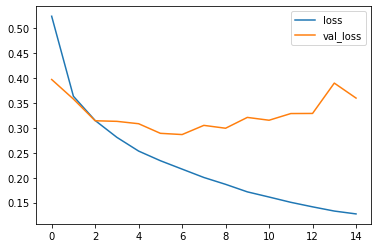

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

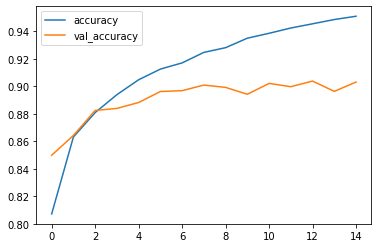

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.3600 - accuracy: 0.9032
[0.359973669052124, 0.9031999707221985]


Confusion matrix, without normalization
[[855   0  20  12   4   1 103   0   5   0]
 [  2 973   2  15   2   0   5   0   1   0]
 [ 15   0 849   8  61   0  65   0   2   0]
 [ 19   6  17 874  55   1  27   0   1   0]
 [  0   0  40  16 889   0  54   0   1   0]
 [  2   1   0   1   0 964   0  19   0  13]
 [ 88   2  57  16 107   0 720   0  10   0]
 [  0   0   0   0   0  10   0 971   0  19]
 [  3   0   2   5   5   1   3   1 979   1]
 [  0   0   0   0   0   5   1  35   1 958]]


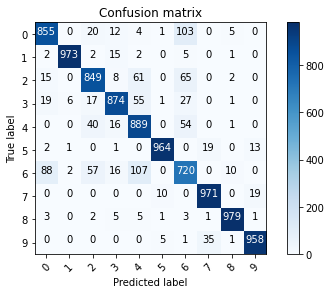

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(cm,classes,normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """ This function prints and plots the confusion matrix.Normaliation can be
   applied by setting by seting 'normalize=True'.
   """
  if normalize:
     cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
     print("Normalized confusion matrix")
  else:
     print('Confusion matrix, without normalization')  
  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)


  fmt='.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")
             

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test =model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))   




In [ ]:
#Label mapping
labels=''' T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split()

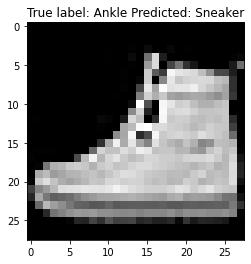

In [ ]:
#show some misclassified examles
missclassified_idx =np.where(p_test != y_test)[0]
i=np.random.choice(missclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]));